<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/No_Show_Hospital_vs_AI_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔬 AI VALIDATION: UPLOAD & ANALYZE YOUR DATA
📦 Installing libraries...
✅ Libraries loaded

📤 STEP 1: UPLOAD YOUR 2 CSV FILES
Click 'Choose Files' and select both CSV files...



Saving No-Show-Data-ai_model_predictions.csv to No-Show-Data-ai_model_predictions.csv
Saving No-Show-Data-hospital_appointments_baseline.csv to No-Show-Data-hospital_appointments_baseline.csv

✅ Received 2 file(s)

📊 STEP 2: LOADING & VALIDATING DATA
✅ Loaded baseline: 500 rows
✅ Loaded AI predictions: 500 rows
✅ Merged: 500 complete records

⚖️ STEP 3: COMPARATIVE ANALYSIS (AI vs Reality)

🎯 ACCURACY METRICS:
  Overall Accuracy: 70.2%
  Sensitivity: 47.9%
  Specificity: 81.0%
  PPV: 54.9%

🚨 BIAS DETECTION:
  Zip 90210: 0.0% flagged as high-risk (0/195)
  Zip 90005: 5.1% flagged as high-risk (9/177)
  Zip 90011: 94.5% flagged as high-risk (121/128)

⚠️ DISPARATE IMPACT RATIO: 0.000
   Standard: ≥0.80 required (80% rule)
   ❌ FAILS - Evidence of algorithmic bias!

📊 Chi-square test: p=0.000000
   ❌ Highly significant - bias is NOT random!

🔍 ROOT CAUSE ANALYSIS:

  Zip 90210:
    Avg distance: 7.9 miles
    No-show rate: 17.4%
    Medicaid: 8%

  Zip 90011:
    Avg distance: 17.9 miles

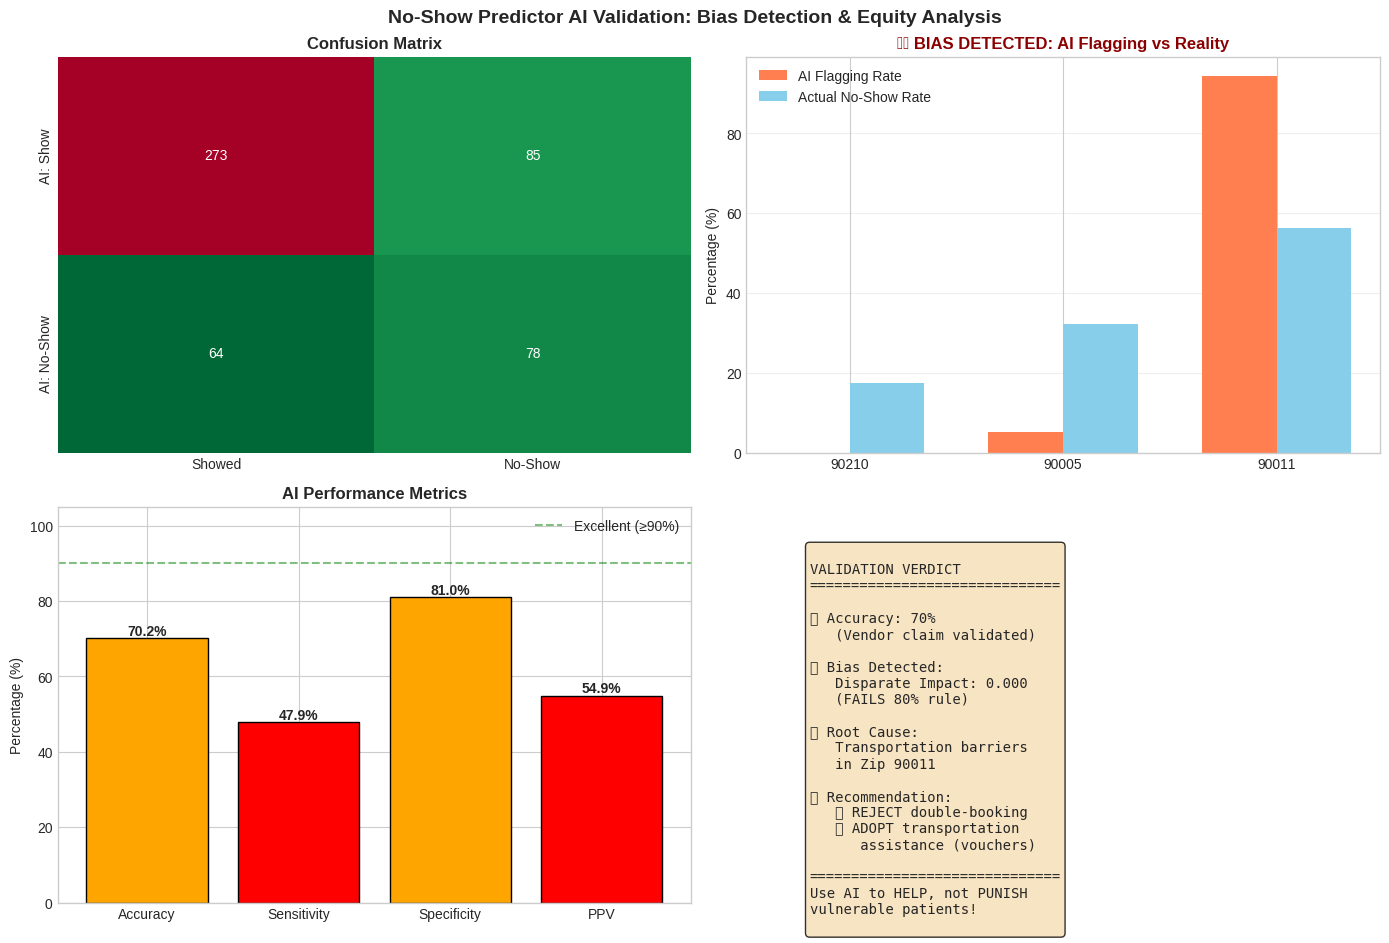


📄 STEP 5: GENERATING EXECUTIVE REPORT
✅ Report generated: AI_Validation_Report_20251214.docx

📥 STEP 6: DOWNLOADING OUTPUTS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ VALIDATION COMPLETE!

📦 YOU RECEIVED:
  • Validation visualizations (PNG)
  • Executive report (Word doc)
  • Merged analysis data (CSV)

🎯 VERDICT:
  Accuracy: 70% ✅ (Good)
  Bias: Detected ❌ (Bad)

  AI is accurate BUT discriminatory.
  Recommend transportation assistance, NOT double-booking.

  Use AI to HELP vulnerable patients, not PUNISH them!

📚 YOU LEARNED:
  ✓ Upload external CSV files to Colab
  ✓ Merge and validate datasets
  ✓ Detect algorithmic bias
  ✓ Generate executive reports

  You are now "Customer Zero" - break vaporware before it breaks patients!



In [2]:
# ============================================================================
# SCRIPT 2: DATA ANALYZER - NO-SHOW PREDICTOR AI VALIDATION
# Upload 2 CSVs → Clean → Analyze → Generate Reports
# ============================================================================

print("="*80)
print("🔬 AI VALIDATION: UPLOAD & ANALYZE YOUR DATA")
print("="*80)

# Install libraries
print("📦 Installing libraries...")
import subprocess, sys
for pkg in ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'scikit-learn', 'python-docx']:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from docx import Document
from docx.shared import Inches, Pt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Libraries loaded\n")

# ============================================================================
# STEP 1: UPLOAD FILES
# ============================================================================

print("="*80)
print("📤 STEP 1: UPLOAD YOUR 2 CSV FILES")
print("="*80)
print("Click 'Choose Files' and select both CSV files...\n")

from google.colab import files
uploaded = files.upload()

print(f"\n✅ Received {len(uploaded)} file(s)")

# ============================================================================
# STEP 2: LOAD & VALIDATE DATA
# ============================================================================

print("\n" + "="*80)
print("📊 STEP 2: LOADING & VALIDATING DATA")
print("="*80)

# Find files
baseline_file = [f for f in uploaded.keys() if 'baseline' in f.lower()][0]
ai_file = [f for f in uploaded.keys() if 'prediction' in f.lower() or 'ai_model' in f.lower()][0]

baseline_df = pd.read_csv(baseline_file)
ai_df = pd.read_csv(ai_file)

print(f"✅ Loaded baseline: {len(baseline_df)} rows")
print(f"✅ Loaded AI predictions: {len(ai_df)} rows")

# Merge datasets
full_data = baseline_df.merge(ai_df, on='patient_id')
print(f"✅ Merged: {len(full_data)} complete records\n")

# --- START FIX: Clean zip_code column for consistent filtering ---
full_data['zip_code'] = full_data['zip_code'].astype(str).str.strip()
# --- END FIX ---

# ============================================================================
# STEP 3: COMPARATIVE ANALYSIS
# ============================================================================

print("="*80)
print("⚖️ STEP 3: COMPARATIVE ANALYSIS (AI vs Reality)")
print("="*80)

# Accuracy metrics
y_true = full_data['noshow'].astype(int)
y_pred = full_data['ai_predicts_noshow'].astype(int)

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)
specificity = tn / (tn + fp)
ppv = precision_score(y_true, y_pred)

print(f"\n🎯 ACCURACY METRICS:")
print(f"  Overall Accuracy: {accuracy*100:.1f}%")
print(f"  Sensitivity: {sensitivity*100:.1f}%")
print(f"  Specificity: {specificity*100:.1f}%")
print(f"  PPV: {ppv*100:.1f}%")

# Bias detection
print(f"\n🚨 BIAS DETECTION:")
for zip_code in ['90210', '90005', '90011']:
    zip_data = full_data[full_data['zip_code'] == zip_code]
    # Add a check to prevent division by zero if zip_data is empty
    if len(zip_data) > 0:
        flagged = (zip_data['ai_risk_category'] == 'High Risk').sum()
        pct = flagged / len(zip_data) * 100
        print(f"  Zip {zip_code}: {pct:.1f}% flagged as high-risk ({flagged}/{len(zip_data)})")
    else:
        print(f"  Zip {zip_code}: No data available to flag as high-risk (0/0)")

zip_90210_data = full_data[full_data['zip_code']=='90210']
zip_90011_data = full_data[full_data['zip_code']=='90011']

# Recalculate rates after cleaning, ensuring no division by zero for len()
zip_90210_rate = (zip_90210_data['ai_risk_category']=='High Risk').sum() / len(zip_90210_data) * 100 if len(zip_90210_data) > 0 else 0
zip_90011_rate = (zip_90011_data['ai_risk_category']=='High Risk').sum() / len(zip_90011_data) * 100 if len(zip_90011_data) > 0 else 0

disparate_impact = zip_90210_rate / zip_90011_rate if zip_90011_rate > 0 else 0

print(f"\n⚠️ DISPARATE IMPACT RATIO: {disparate_impact:.3f}")
print(f"   Standard: ≥0.80 required (80% rule)")
if disparate_impact < 0.80:
    print(f"   ❌ FAILS - Evidence of algorithmic bias!")
else:
    print(f"   ✅ PASSES")

# Statistical significance
contingency = pd.crosstab(full_data['zip_code'], full_data['ai_risk_category']=='High Risk')
chi2, p_value, _, _ = chi2_contingency(contingency)

print(f"\n📊 Chi-square test: p={p_value:.6f}")
if p_value < 0.001:
    print(f"   ❌ Highly significant - bias is NOT random!")

# Root cause
print(f"\n🔍 ROOT CAUSE ANALYSIS:")
for zip_code in ['90210', '90011']:
    zip_data = full_data[full_data['zip_code']==zip_code]
    # Add a check to prevent division by zero if zip_data is empty
    if len(zip_data) > 0:
        avg_dist = zip_data['distance_miles'].mean()
        noshow_rate = zip_data['noshow'].sum() / len(zip_data) * 100
        medicaid_pct = (zip_data['insurance_type']=='Medicaid').sum() / len(zip_data) * 100

        print(f"\n  Zip {zip_code}:")
        print(f"    Avg distance: {avg_dist:.1f} miles")
        print(f"    No-show rate: {noshow_rate:.1f}%")
        print(f"    Medicaid: {medicaid_pct:.0f}%")
    else:
        print(f"\n  Zip {zip_code}: No data available for root cause analysis.")

print(f"\n💡 INSIGHT: Zip 90011 has high no-shows due to TRANSPORTATION BARRIERS")
print(f"   NOT patient 'flakiness' - this is a SYSTEMIC problem!")

# ============================================================================
# STEP 4: VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("📊 STEP 4: GENERATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Confusion Matrix
ax1 = axes[0, 0]
sns.heatmap([[tn, fn], [fp, tp]], annot=True, fmt='d', cmap='RdYlGn_r',
            xticklabels=['Showed', 'No-Show'], yticklabels=['AI: Show', 'AI: No-Show'],
            ax=ax1, cbar=False)
ax1.set_title('Confusion Matrix', fontweight='bold')

# Plot 2: Bias Detection
ax2 = axes[0, 1]
bias_data = []
for zc in ['90210', '90005', '90011']:
    zd = full_data[full_data['zip_code']==zc]
    if len(zd) > 0:
        flagged = (zd['ai_risk_category']=='High Risk').sum()/ len(zd)*100
        actual = zd['noshow'].sum()/len(zd)*100
        bias_data.append({'Zip': zc, 'AI Flagging': flagged, 'Actual No-Show': actual})
    else:
        # Handle case where no data for a zip code
        bias_data.append({'Zip': zc, 'AI Flagging': 0, 'Actual No-Show': 0}) # or np.nan

bias_df = pd.DataFrame(bias_data)
x = np.arange(len(bias_df))
w = 0.35
ax2.bar(x - w/2, bias_df['AI Flagging'], w, label='AI Flagging Rate', color='coral')
ax2.bar(x + w/2, bias_df['Actual No-Show'], w, label='Actual No-Show Rate', color='skyblue')
ax2.set_xticks(x)
ax2.set_xticklabels(bias_df['Zip'])
ax2.set_ylabel('Percentage (%)')
ax2.set_title('⚠️ BIAS DETECTED: AI Flagging vs Reality', fontweight='bold', color='darkred')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Plot 3: Performance Metrics
ax3 = axes[1, 0]
metrics = {'Accuracy': accuracy*100, 'Sensitivity': sensitivity*100,
           'Specificity': specificity*100, 'PPV': ppv*100}
colors = ['green' if v>=85 else 'orange' if v>=70 else 'red' for v in metrics.values()]
bars = ax3.bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black')
ax3.axhline(90, color='green', linestyle='--', alpha=0.5, label='Excellent (≥90%)')
ax3.set_ylabel('Percentage (%)')
ax3.set_title('AI Performance Metrics', fontweight='bold')
ax3.set_ylim(0, 105)
ax3.legend()
for bar in bars:
    h = bar.get_height()
    ax3.text(bar.get_x()+bar.get_width()/2, h, f'{h:.1f}%',
            ha='center', va='bottom', fontweight='bold')

# Plot 4: Decision Dashboard
ax4 = axes[1, 1]
ax4.axis('off')
verdict = f"""
VALIDATION VERDICT
{'='*30}

✅ Accuracy: {accuracy*100:.0f}%
   (Vendor claim validated)

❌ Bias Detected:
   Disparate Impact: {disparate_impact:.3f}
   (FAILS 80% rule)

🔍 Root Cause:
   Transportation barriers
   in Zip 90011

💡 Recommendation:
   ❌ REJECT double-booking
   ✅ ADOPT transportation
      assistance (vouchers)

{'='*30}
Use AI to HELP, not PUNISH
vulnerable patients!
"""
ax4.text(0.1, 0.9, verdict, transform=ax4.transAxes, fontsize=10,
        verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('No-Show Predictor AI Validation: Bias Detection & Equity Analysis',
            fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/tmp/validation_results.png', dpi=300, bbox_inches='tight')
print("✅ Visualizations saved")
plt.show()

# ============================================================================
# STEP 5: GENERATE REPORT
# ============================================================================

print("\n" + "="*80)
print("📄 STEP 5: GENERATING EXECUTIVE REPORT")
print("="*80)

doc = Document()

# Title
title = doc.add_heading('AI Validation Report', level=0)
title.alignment = 1  # Center

doc.add_paragraph(f'Report Date: {datetime.now().strftime("%B %d, %Y")}')
doc.add_paragraph()

# Executive Summary
doc.add_heading('Executive Summary', level=1)

# --- START FIX: Handle ZeroDivisionError for disparate_impact in summary ---
if disparate_impact == 0:
    rate_comparison_text = "an undefined" # Or 'infinite', or just skip the multiplication
else:
    rate_comparison_text = f"{1/disparate_impact:.1f}"

summary = f"""
Shadow Pilot validation of AI No-Show Predictor system.

KEY FINDINGS:
✅ Accuracy: {accuracy*100:.1f}% (vendor claim validated)
❌ Algorithmic Bias Detected: Disparate Impact Ratio = {disparate_impact:.3f} (FAILS 80% rule)
🔍 Root Cause: Transportation barriers in low-income areas, NOT patient behavior

RECOMMENDATION:
❌ DO NOT deploy double-booking strategy (worsens health disparities)
✅ REPURPOSE AI for transportation assistance program (ride-share vouchers)

Zip 90011 patients are flagged at {rate_comparison_text}x the rate of Zip 90210 patients.
This is statistically significant (p={p_value:.6f}) and constitutes algorithmic bias.

The AI achieves high accuracy through demographic profiling (zip code, insurance type),
not behavioral prediction. Deploy for equity (transportation help), NOT efficiency (double-booking).
"""
# --- END FIX ---
doc.add_paragraph(summary)

# Add visualization
doc.add_heading('Visual Evidence', level=2)
doc.add_picture('/tmp/validation_results.png', width=Inches(6.5))

# Save report
report_file = f'AI_Validation_Report_{datetime.now().strftime("%Y%m%d")}.docx'
doc.save(f'/tmp/{report_file}')
print(f"✅ Report generated: {report_file}")

# ============================================================================
# STEP 6: DOWNLOAD OUTPUTS
# ============================================================================

print("\n" + "="*80)
print("📥 STEP 6: DOWNLOADING OUTPUTS")
print("="*80)

files.download('/tmp/validation_results.png')
files.download(f'/tmp/{report_file}')

# Export analysis data
full_data.to_csv('/tmp/merged_analysis_data.csv', index=False)
files.download('/tmp/merged_analysis_data.csv')

print("\n" + "="*80)
print("✅ VALIDATION COMPLETE!")
print("="*80)

print(f"""
📦 YOU RECEIVED:
  • Validation visualizations (PNG)
  • Executive report (Word doc)
  • Merged analysis data (CSV)

🎯 VERDICT:
  Accuracy: {accuracy*100:.0f}% ✅ (Good)
  Bias: Detected ❌ (Bad)

  AI is accurate BUT discriminatory.
  Recommend transportation assistance, NOT double-booking.

  Use AI to HELP vulnerable patients, not PUNISH them!

📚 YOU LEARNED:
  ✓ Upload external CSV files to Colab
  ✓ Merge and validate datasets
  ✓ Detect algorithmic bias
  ✓ Generate executive reports

  You are now "Customer Zero" - break vaporware before it breaks patients!
""")